In [ ]:
!pip install qiskit==0.46 qiskit-ibmq-provider pylatexenc qiskit-aer

# Алгоритм Гровера

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import BasicAer, execute
import numpy as np
import matplotlib.pyplot as plt

backend = BasicAer.get_backend('qasm_simulator')
prob_of_ans = []

for x in range(15):
    database = QuantumRegister(7)
    oracle = QuantumRegister(1)
    auxiliary = QuantumRegister(6)
    cr = ClassicalRegister(7)
    qc = QuantumCircuit(database, oracle, auxiliary, cr)

    qc.h(database[:])
    qc.x(oracle[0])
    qc.h(oracle[0])

    for j in range(x):
        qc.mct(database[:], oracle[0], auxiliary[:], mode='basic')

        qc.h(database[:])
        qc.x(database[:])
        qc.h(database[6])
        qc.mct(database[0:6], database[6], auxiliary[:], mode='basic')
        qc.h(database[6])
        qc.x(database[:])
        qc.h(database[:])

    qc.h(oracle[0])
    qc.x(oracle[0])
    qc.measure(database, cr)

    qc = qc.reverse_bits()

    job = execute(qc, backend=backend, shots=1000, seed_simulator=1234, backend_options={"fusion_enable":True})
    result = job.result()
    count = result.get_counts()
    answer = count.get('1111111', 0)
    prob_of_ans.append(answer)

<ipython-input-7-9ea946a582e9>:2: DeprecationWarning: BasicAer is deprecated since Qiskit 0.46 and will be removed in Qiskit 1.0. The BasicAer (qiskit.providers.basicaer) module has been superseded by  qiskit.providers.basic_provider, and all its classes have been renamed to follow a new naming convention. More information and migration guidelines can be found in the 0.46 API docs for BasicAer.
  from qiskit import BasicAer, execute
<ipython-input-7-9ea946a582e9>:37: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(qc, backend=backend, shots=1000, seed_simulator=1234, backend_options={"fusion_enable":True})
<ipython-input-7-9ea946a582e9>:21: DeprecationWarning: The method `

# График

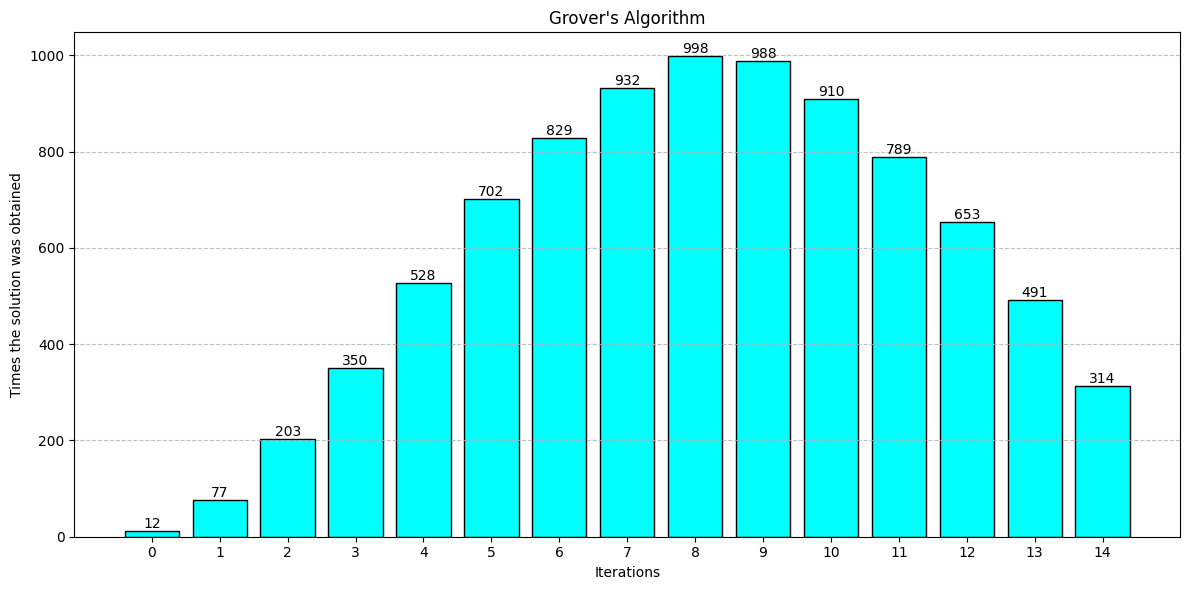

In [ ]:
iteration = list(range(15))
correct = prob_of_ans

plt.figure(figsize=(12, 6))
plt.bar(iteration, correct, color='aqua', edgecolor='black')
plt.xlabel('Iterations')
plt.ylabel('Times the solution was obtained')
plt.title("Grover's Algorithm")
plt.xticks(iteration)
plt.grid(axis='y', linestyle='--', alpha=0.8)

for i, v in enumerate(correct):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()